In [1]:
class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [2]:

import torch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def CORAL(source, target):
    d = source.size(1)
    ns, nt = source.size(0), target.size(0)

    # source covariance
    tmp_s = torch.ones((1, ns)).to(DEVICE) @ source
    cs = (source.t() @ source - (tmp_s.t() @ tmp_s) / ns) / (ns - 1)

    # target covariance
    tmp_t = torch.ones((1, nt)).to(DEVICE) @ target
    ct = (target.t() @ target - (tmp_t.t() @ tmp_t) / nt) / (nt - 1)

    # frobenius norm
    loss = (cs - ct).pow(2).sum().sqrt()
    loss = loss / (4 * d * d)

    return loss

In [3]:
print(DEVICE)

cuda


In [4]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torchvision import models
from torch.autograd import Variable


# convnet without the last layer
class AlexNetFc(nn.Module):
    def __init__(self):
        super(AlexNetFc, self).__init__()
        model_alexnet = models.alexnet(pretrained=True)
        self.features = model_alexnet.features
        self.classifier = nn.Sequential()
        for i in range(6):
            self.classifier.add_module(
                "classifier"+str(i), model_alexnet.classifier[i])
        self.__in_features = model_alexnet.classifier[6].in_features

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256*6*6)
        x = self.classifier(x)
        return x

    def output_num(self):
        return self.__in_features


class ResNet18Fc(nn.Module):
    def __init__(self):
        super(ResNet18Fc, self).__init__()
        model_resnet18 = models.resnet18(pretrained=True)
        self.conv1 = model_resnet18.conv1
        self.bn1 = model_resnet18.bn1
        self.relu = model_resnet18.relu
        self.maxpool = model_resnet18.maxpool
        self.layer1 = model_resnet18.layer1
        self.layer2 = model_resnet18.layer2
        self.layer3 = model_resnet18.layer3
        self.layer4 = model_resnet18.layer4
        self.avgpool = model_resnet18.avgpool
        self.__in_features = model_resnet18.fc.in_features

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return x

    def output_num(self):
        return self.__in_features


class ResNet34Fc(nn.Module):
    def __init__(self):
        super(ResNet34Fc, self).__init__()
        model_resnet34 = models.resnet34(pretrained=True)
        self.conv1 = model_resnet34.conv1
        self.bn1 = model_resnet34.bn1
        self.relu = model_resnet34.relu
        self.maxpool = model_resnet34.maxpool
        self.layer1 = model_resnet34.layer1
        self.layer2 = model_resnet34.layer2
        self.layer3 = model_resnet34.layer3
        self.layer4 = model_resnet34.layer4
        self.avgpool = model_resnet34.avgpool
        self.__in_features = model_resnet34.fc.in_features

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return x

    def output_num(self):
        return self.__in_features


class ResNet50Fc(nn.Module):
    def __init__(self):
        super(ResNet50Fc, self).__init__()
        model_resnet50 = models.resnet50(pretrained=True)
        self.conv1 = model_resnet50.conv1
        self.bn1 = model_resnet50.bn1
        self.relu = model_resnet50.relu
        self.maxpool = model_resnet50.maxpool
        self.layer1 = model_resnet50.layer1
        self.layer2 = model_resnet50.layer2
        self.layer3 = model_resnet50.layer3
        self.layer4 = model_resnet50.layer4
        self.avgpool = model_resnet50.avgpool
        self.__in_features = model_resnet50.fc.in_features

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return x

    def output_num(self):
        return self.__in_features


class ResNet101Fc(nn.Module):
    def __init__(self):
        super(ResNet101Fc, self).__init__()
        model_resnet101 = models.resnet101(pretrained=True)
        self.conv1 = model_resnet101.conv1
        self.bn1 = model_resnet101.bn1
        self.relu = model_resnet101.relu
        self.maxpool = model_resnet101.maxpool
        self.layer1 = model_resnet101.layer1
        self.layer2 = model_resnet101.layer2
        self.layer3 = model_resnet101.layer3
        self.layer4 = model_resnet101.layer4
        self.avgpool = model_resnet101.avgpool
        self.__in_features = model_resnet101.fc.in_features

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return x

    def output_num(self):
        return self.__in_features


class ResNet152Fc(nn.Module):
    def __init__(self):
        super(ResNet152Fc, self).__init__()
        model_resnet152 = models.resnet152(pretrained=True)
        self.conv1 = model_resnet152.conv1
        self.bn1 = model_resnet152.bn1
        self.relu = model_resnet152.relu
        self.maxpool = model_resnet152.maxpool
        self.layer1 = model_resnet152.layer1
        self.layer2 = model_resnet152.layer2
        self.layer3 = model_resnet152.layer3
        self.layer4 = model_resnet152.layer4
        self.avgpool = model_resnet152.avgpool
        self.__in_features = model_resnet152.fc.in_features

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return x

    def output_num(self):
        return self.__in_features


network_dict = {"alexnet": AlexNetFc,
                "resnet18": ResNet18Fc,
                "resnet34": ResNet34Fc,
                "resnet50": ResNet50Fc,
                "resnet101": ResNet101Fc,
                "resnet152": ResNet152Fc}

In [5]:
print(network_dict, network_dict['resnet34'])

{'alexnet': <class '__main__.AlexNetFc'>, 'resnet18': <class '__main__.ResNet18Fc'>, 'resnet34': <class '__main__.ResNet34Fc'>, 'resnet50': <class '__main__.ResNet50Fc'>, 'resnet101': <class '__main__.ResNet101Fc'>, 'resnet152': <class '__main__.ResNet152Fc'>} <class '__main__.ResNet34Fc'>


In [6]:
CFG = {
    'data_path': 'office31/',
    'kwargs': {'num_workers': 4},
    'batch_size': 24,
    'epoch': 100,
    'lr': 1e-3,
    'momentum': .9,
    'log_interval': 10,
    'l2_decay': 0,
    'lambda': 10,
    'backbone': 'alexnet',
    'n_class': 31,
}

In [7]:
# mmd
import torch


class MMD_loss(nn.Module):
    def __init__(self, kernel_type='rbf', kernel_mul=2.0, kernel_num=5):
        super(MMD_loss, self).__init__()
        self.kernel_num = kernel_num
        self.kernel_mul = kernel_mul
        self.fix_sigma = None
        self.kernel_type = kernel_type

    def guassian_kernel(self, source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
        n_samples = int(source.size()[0]) + int(target.size()[0])
        total = torch.cat([source, target], dim=0)
        total0 = total.unsqueeze(0).expand(
            int(total.size(0)), int(total.size(0)), int(total.size(1)))
        total1 = total.unsqueeze(1).expand(
            int(total.size(0)), int(total.size(0)), int(total.size(1)))
        L2_distance = ((total0-total1)**2).sum(2)
        if fix_sigma:
            bandwidth = fix_sigma
        else:
            bandwidth = torch.sum(L2_distance.data) / (n_samples**2-n_samples)
        bandwidth /= kernel_mul ** (kernel_num // 2)
        bandwidth_list = [bandwidth * (kernel_mul**i)
                          for i in range(kernel_num)]
        kernel_val = [torch.exp(-L2_distance / bandwidth_temp)
                      for bandwidth_temp in bandwidth_list]
        return sum(kernel_val)

    def linear_mmd2(self, f_of_X, f_of_Y):
        loss = 0.0
        delta = f_of_X.float().mean(0) - f_of_Y.float().mean(0)
        loss = delta.dot(delta.T)
        return loss

    def forward(self, source, target):
        if self.kernel_type == 'linear':
            return self.linear_mmd2(source, target)
        elif self.kernel_type == 'rbf':
            batch_size = int(source.size()[0])
            kernels = self.guassian_kernel(
                source, target, kernel_mul=self.kernel_mul, kernel_num=self.kernel_num, fix_sigma=self.fix_sigma)
            with torch.no_grad():
                XX = torch.mean(kernels[:batch_size, :batch_size])
                YY = torch.mean(kernels[batch_size:, batch_size:])
                XY = torch.mean(kernels[:batch_size, batch_size:])
                YX = torch.mean(kernels[batch_size:, :batch_size])
                loss = torch.mean(XX + YY - XY - YX)
            torch.cuda.empty_cache()
            return loss

In [8]:
import torchvision


class Transfer_Net(nn.Module):
    def __init__(self, num_class, base_net='resnet50', transfer_loss='mmd', use_bottleneck=True, bottleneck_width=256, width=1024):
        super(Transfer_Net, self).__init__()
        self.base_network = network_dict[base_net]()
        self.use_bottleneck = use_bottleneck
        self.transfer_loss = transfer_loss
        bottleneck_list = [nn.Linear(self.base_network.output_num(
        ), bottleneck_width), nn.BatchNorm1d(bottleneck_width), nn.ReLU(), nn.Dropout(0.5)]
        self.bottleneck_layer = nn.Sequential(*bottleneck_list)
        classifier_layer_list = [nn.Linear(self.base_network.output_num(), width), nn.ReLU(), nn.Dropout(0.5),
                                 nn.Linear(width, num_class)]
        self.classifier_layer = nn.Sequential(*classifier_layer_list)

        self.bottleneck_layer[0].weight.data.normal_(0, 0.005)
        self.bottleneck_layer[0].bias.data.fill_(0.1)
        for i in range(2):
            self.classifier_layer[i * 3].weight.data.normal_(0, 0.01)
            self.classifier_layer[i * 3].bias.data.fill_(0.0)

    def forward(self, source, target):
        source = self.base_network(source)
        target = self.base_network(target)
        source_clf = self.classifier_layer(source)
        if self.use_bottleneck:
            source = self.bottleneck_layer(source)
            target = self.bottleneck_layer(target)
        transfer_loss = self.adapt_loss(source, target, self.transfer_loss)
        return source_clf, transfer_loss

    def predict(self, x):
        features = self.base_network(x)
        clf = self.classifier_layer(features)
        return clf

    def adapt_loss(self, X, Y, adapt_loss):
        """Compute adaptation loss, currently we support mmd and coral
        Arguments:
            X {tensor} -- source matrix
            Y {tensor} -- target matrix
            adapt_loss {string} -- loss type, 'mmd' or 'coral'. You can add your own loss
        Returns:
            [tensor] -- adaptation loss tensor
        """
        if adapt_loss == 'mmd':
            mmd_loss = MMD_loss()
            loss = mmd_loss(X, Y)
        elif adapt_loss == 'coral':
            loss = CORAL(X, Y)
        else:
            loss = 0
        return loss

In [9]:
model_ = Transfer_Net(CFG['n_class'], transfer_loss='mmd', base_net='resnet50').to(DEVICE)

In [10]:
from torchvision import datasets, transforms
def load_data_img(data_folder, batch_size, train, kwargs):
    transform = {
        'train': transforms.Compose(
            [transforms.Resize([256, 256]),
                transforms.RandomCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])]),
        'test': transforms.Compose(
            [transforms.Resize([224, 224]),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])])
        }
    data = datasets.ImageFolder(root = data_folder, transform=transform['train' if train else 'test'])
    data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, **kwargs, drop_last = True if train else False)
    return data_loader



In [11]:
test_loader = load_data_img('office31/amazon/images/', 32, True,  CFG['kwargs'])
for inputs_, labels_ in test_loader:
    print(inputs_, labels_)
    print(inputs_.shape, labels_.shape)
    break

tensor([[[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

         [[2.4286, 2.4286, 2.4286,  ..., 2.4111, 2.4111, 2.4111],
          [2.4286, 2.4286, 2.4286,  ..., 2.4111, 2.4111, 2.4111],
          [2.4286, 2.4286, 2.4286,  ..., 2.3936, 2.4111, 2.4111],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2

# main

In [12]:
import torch
import os
import math
import numpy as np

log=[]
acc = []
def test(model, target_test_loader):
    model.eval()
    test_loss = AverageMeter()
    correct = 0
    criterion = torch.nn.CrossEntropyLoss()
    len_target_dataset = len(target_test_loader.dataset)
    with torch.no_grad():
        for data, target in target_test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            s_output = model.predict(data)
            loss = criterion(s_output, target)
            test_loss.update(loss.item())
            pred = torch.max(s_output, 1)[1]
            correct += torch.sum(pred == target)

    print('{} --> {}: max correct: {}, accuracy{: .2f}%\n'.format(
        source_name, target_name, correct, 100. * correct / len_target_dataset))
    acc.append([100 * correct / len_target_dataset, correct, len_target_dataset])


def train(source_loader, target_train_loader, target_test_loader, model, optimizer, CFG):
    len_source_loader = len(source_loader)
    len_target_loader = len(target_train_loader)
    for e in range(CFG['epoch']):
        train_loss_clf = AverageMeter()
        train_loss_transfer = AverageMeter()
        train_loss_total = AverageMeter()
        model.train()
        iter_source, iter_target = iter(
            source_loader), iter(target_train_loader)
        n_batch = min(len_source_loader, len_target_loader)
        criterion = torch.nn.CrossEntropyLoss()
        for i in range(n_batch):
            data_source, label_source = iter_source.next()
            data_target, _ = iter_target.next()
            data_source, label_source = data_source.to(
                DEVICE), label_source.to(DEVICE)
            data_target = data_target.to(DEVICE)

            optimizer.zero_grad()
            label_source_pred, transfer_loss = model(data_source, data_target)
            clf_loss = criterion(label_source_pred, label_source)
            loss = clf_loss + CFG['lambda'] * transfer_loss
            loss.backward()
            optimizer.step()
            train_loss_clf.update(clf_loss.item())
            train_loss_transfer.update(transfer_loss.item())
            train_loss_total.update(loss.item())
            if i % CFG['log_interval'] == 0:
                print('Train Epoch: [{}/{} ({:02d}%)], cls_Loss: {:.6f}, transfer_loss: {:.6f}, total_Loss: {:.6f}'.format(
                    e + 1,
                    CFG['epoch'],
                    int(100. * i / n_batch), train_loss_clf.avg, train_loss_transfer.avg, train_loss_total.avg))
        log.append([train_loss_clf.avg, train_loss_transfer.avg, train_loss_total.avg])
        np_log = np.array(log, dtype=float)
        np.savetxt('train_log.csv', np_log, delimiter=',', fmt='%.6f')
        # Test
        test(model, target_test_loader)
    

def load_data(src, tar, root_dir):
    folder_src = root_dir + src + '/images/'
    folder_tar = root_dir + tar + '/images/'
    source_loader = load_data_img(
        folder_src, CFG['batch_size'], True, CFG['kwargs'])
    target_train_loader = load_data_img(
        folder_tar, CFG['batch_size'], True, CFG['kwargs'])
    target_test_loader = load_data_img(
        folder_tar, CFG['batch_size'], False, CFG['kwargs'])
    return source_loader, target_train_loader, target_test_loader



load_data('amazon', 'webcam', 'office31/')


(<torch.utils.data.dataloader.DataLoader at 0x7fb86f181be0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb86f194f60>)

In [13]:

torch.manual_seed(0)

source_name = "amazon"
target_name = "webcam"

print('Src: %s, Tar: %s' % (source_name, target_name))

source_loader, target_train_loader, target_test_loader = load_data(source_name, target_name, CFG['data_path'])



Src: amazon, Tar: webcam


In [14]:
model = Transfer_Net(
    CFG['n_class'], transfer_loss='mmd', base_net='resnet50').to(DEVICE)
optimizer = torch.optim.SGD([
    {'params': model.base_network.parameters()},
    {'params': model.bottleneck_layer.parameters(), 'lr': 10 * CFG['lr']},
    {'params': model.classifier_layer.parameters(), 'lr': 10 * CFG['lr']},
], lr=CFG['lr'], momentum=CFG['momentum'], weight_decay=CFG['l2_decay'])

train(source_loader, target_train_loader,
      target_test_loader, model, optimizer, CFG)

Train Epoch: [1/100 (00%)], cls_Loss: 3.440253, transfer_loss: 0.212678, total_Loss: 5.567032
Train Epoch: [1/100 (30%)], cls_Loss: 3.404644, transfer_loss: 0.213843, total_Loss: 5.543071
Train Epoch: [1/100 (60%)], cls_Loss: 3.365681, transfer_loss: 0.215158, total_Loss: 5.517257
Train Epoch: [1/100 (90%)], cls_Loss: 3.316082, transfer_loss: 0.215270, total_Loss: 5.468784
amazon --> webcam: max correct: 221, accuracy 27.80%

Train Epoch: [2/100 (00%)], cls_Loss: 2.836616, transfer_loss: 0.214170, total_Loss: 4.978311
Train Epoch: [2/100 (30%)], cls_Loss: 2.812130, transfer_loss: 0.215378, total_Loss: 4.965913
Train Epoch: [2/100 (60%)], cls_Loss: 2.619346, transfer_loss: 0.214964, total_Loss: 4.768982
Train Epoch: [2/100 (90%)], cls_Loss: 2.428165, transfer_loss: 0.214500, total_Loss: 4.573161
amazon --> webcam: max correct: 367, accuracy 46.16%

Train Epoch: [3/100 (00%)], cls_Loss: 1.454873, transfer_loss: 0.210630, total_Loss: 3.561177
Train Epoch: [3/100 (30%)], cls_Loss: 1.623422

Train Epoch: [20/100 (00%)], cls_Loss: 0.197693, transfer_loss: 0.218181, total_Loss: 2.379507
Train Epoch: [20/100 (30%)], cls_Loss: 0.247334, transfer_loss: 0.214142, total_Loss: 2.388749
Train Epoch: [20/100 (60%)], cls_Loss: 0.254326, transfer_loss: 0.214135, total_Loss: 2.395681
Train Epoch: [20/100 (90%)], cls_Loss: 0.224846, transfer_loss: 0.214480, total_Loss: 2.369643
amazon --> webcam: max correct: 612, accuracy 76.98%

Train Epoch: [21/100 (00%)], cls_Loss: 0.052140, transfer_loss: 0.223468, total_Loss: 2.286824
Train Epoch: [21/100 (30%)], cls_Loss: 0.212320, transfer_loss: 0.215340, total_Loss: 2.365719
Train Epoch: [21/100 (60%)], cls_Loss: 0.208259, transfer_loss: 0.215002, total_Loss: 2.358277
Train Epoch: [21/100 (90%)], cls_Loss: 0.191653, transfer_loss: 0.215524, total_Loss: 2.346897
amazon --> webcam: max correct: 573, accuracy 72.08%

Train Epoch: [22/100 (00%)], cls_Loss: 0.220366, transfer_loss: 0.215786, total_Loss: 2.378230
Train Epoch: [22/100 (30%)], cls_Loss

Train Epoch: [39/100 (00%)], cls_Loss: 0.019988, transfer_loss: 0.207038, total_Loss: 2.090372
Train Epoch: [39/100 (30%)], cls_Loss: 0.054126, transfer_loss: 0.210623, total_Loss: 2.160356
Train Epoch: [39/100 (60%)], cls_Loss: 0.054099, transfer_loss: 0.212965, total_Loss: 2.183749
Train Epoch: [39/100 (90%)], cls_Loss: 0.070610, transfer_loss: 0.212999, total_Loss: 2.200602
amazon --> webcam: max correct: 609, accuracy 76.60%

Train Epoch: [40/100 (00%)], cls_Loss: 0.047268, transfer_loss: 0.207176, total_Loss: 2.119029
Train Epoch: [40/100 (30%)], cls_Loss: 0.027260, transfer_loss: 0.210927, total_Loss: 2.136530
Train Epoch: [40/100 (60%)], cls_Loss: 0.034407, transfer_loss: 0.212576, total_Loss: 2.160163
Train Epoch: [40/100 (90%)], cls_Loss: 0.052142, transfer_loss: 0.213272, total_Loss: 2.184864
amazon --> webcam: max correct: 590, accuracy 74.21%

Train Epoch: [41/100 (00%)], cls_Loss: 0.021093, transfer_loss: 0.211607, total_Loss: 2.137164
Train Epoch: [41/100 (30%)], cls_Loss

Train Epoch: [58/100 (00%)], cls_Loss: 0.070110, transfer_loss: 0.227588, total_Loss: 2.345991
Train Epoch: [58/100 (30%)], cls_Loss: 0.034633, transfer_loss: 0.216895, total_Loss: 2.203581
Train Epoch: [58/100 (60%)], cls_Loss: 0.036369, transfer_loss: 0.215090, total_Loss: 2.187272
Train Epoch: [58/100 (90%)], cls_Loss: 0.049014, transfer_loss: 0.215328, total_Loss: 2.202297
amazon --> webcam: max correct: 568, accuracy 71.45%

Train Epoch: [59/100 (00%)], cls_Loss: 0.071605, transfer_loss: 0.205809, total_Loss: 2.129691
Train Epoch: [59/100 (30%)], cls_Loss: 0.030140, transfer_loss: 0.213742, total_Loss: 2.167563
Train Epoch: [59/100 (60%)], cls_Loss: 0.029753, transfer_loss: 0.215004, total_Loss: 2.179792
Train Epoch: [59/100 (90%)], cls_Loss: 0.035903, transfer_loss: 0.214145, total_Loss: 2.177350
amazon --> webcam: max correct: 563, accuracy 70.82%

Train Epoch: [60/100 (00%)], cls_Loss: 0.011070, transfer_loss: 0.212952, total_Loss: 2.140586
Train Epoch: [60/100 (30%)], cls_Loss

Train Epoch: [77/100 (00%)], cls_Loss: 0.000397, transfer_loss: 0.213452, total_Loss: 2.134918
Train Epoch: [77/100 (30%)], cls_Loss: 0.035443, transfer_loss: 0.212858, total_Loss: 2.164020
Train Epoch: [77/100 (60%)], cls_Loss: 0.034148, transfer_loss: 0.213603, total_Loss: 2.170181
Train Epoch: [77/100 (90%)], cls_Loss: 0.036014, transfer_loss: 0.212507, total_Loss: 2.161084
amazon --> webcam: max correct: 567, accuracy 71.32%

Train Epoch: [78/100 (00%)], cls_Loss: 0.029592, transfer_loss: 0.204070, total_Loss: 2.070288
Train Epoch: [78/100 (30%)], cls_Loss: 0.029422, transfer_loss: 0.211534, total_Loss: 2.144761
Train Epoch: [78/100 (60%)], cls_Loss: 0.018290, transfer_loss: 0.212289, total_Loss: 2.141180
Train Epoch: [78/100 (90%)], cls_Loss: 0.035717, transfer_loss: 0.211982, total_Loss: 2.155538
amazon --> webcam: max correct: 532, accuracy 66.92%

Train Epoch: [79/100 (00%)], cls_Loss: 0.043439, transfer_loss: 0.210397, total_Loss: 2.147404
Train Epoch: [79/100 (30%)], cls_Loss

Train Epoch: [96/100 (00%)], cls_Loss: 0.002461, transfer_loss: 0.211558, total_Loss: 2.118037
Train Epoch: [96/100 (30%)], cls_Loss: 0.018805, transfer_loss: 0.214414, total_Loss: 2.162947
Train Epoch: [96/100 (60%)], cls_Loss: 0.025988, transfer_loss: 0.215871, total_Loss: 2.184701
Train Epoch: [96/100 (90%)], cls_Loss: 0.030735, transfer_loss: 0.215432, total_Loss: 2.185057
amazon --> webcam: max correct: 569, accuracy 71.57%

Train Epoch: [97/100 (00%)], cls_Loss: 0.006343, transfer_loss: 0.213133, total_Loss: 2.137676
Train Epoch: [97/100 (30%)], cls_Loss: 0.061539, transfer_loss: 0.212608, total_Loss: 2.187621
Train Epoch: [97/100 (60%)], cls_Loss: 0.048685, transfer_loss: 0.213476, total_Loss: 2.183442
Train Epoch: [97/100 (90%)], cls_Loss: 0.038488, transfer_loss: 0.213383, total_Loss: 2.172313
amazon --> webcam: max correct: 571, accuracy 71.82%

Train Epoch: [98/100 (00%)], cls_Loss: 0.007120, transfer_loss: 0.214763, total_Loss: 2.154753
Train Epoch: [98/100 (30%)], cls_Loss

In [18]:
print(log[:10])
print(acc[:10])

[[3.3018638292948403, 0.21489320740555273, 5.4507958961255625], [2.4047134572809394, 0.2144298372846661, 4.549011859026822], [1.3790370280092412, 0.2150639367826057, 3.5296764012539024], [1.0321817072955044, 0.21418277061346805, 3.174009417042588], [0.971176901550004, 0.2143961407921531, 3.1151383139870386], [0.7628376953529589, 0.21502716613538336, 2.91310935309439], [0.6599853612256773, 0.2139359459732518, 2.7993448286345513], [0.5769550678404894, 0.21494379549315482, 2.726393034963897], [0.46690843999385834, 0.2133214690468528, 2.600123138138742], [0.5311023563598142, 0.21573133179635712, 2.688415693514275]]
[[tensor(27, device='cuda:0'), tensor(221, device='cuda:0'), 795], [tensor(46, device='cuda:0'), tensor(367, device='cuda:0'), 795], [tensor(57, device='cuda:0'), tensor(454, device='cuda:0'), 795], [tensor(55, device='cuda:0'), tensor(445, device='cuda:0'), 795], [tensor(70, device='cuda:0'), tensor(563, device='cuda:0'), 795], [tensor(68, device='cuda:0'), tensor(545, device='

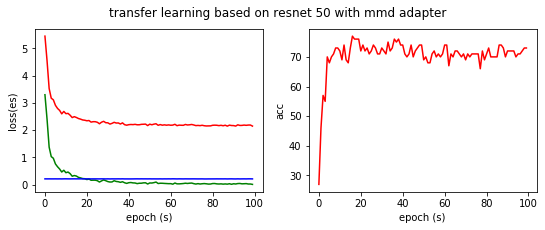

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# create some data to use for the plot

t = np.arange(0, 100)
#fig, axis = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
fig, axis = plt.subplots(nrows=1, ncols=2,  figsize=(9, 3),sharex=True)

cls_loss_ = [a[0] for a in log]
trans_loss_ = [a[1] for a in log]
total_loss_ = [a[2] for a in log]
#print(src_loss_[:10])
# the main axes is subplot(111) by default
axis[0].plot(t, cls_loss_,'g',label='cls_loss' )
axis[0].plot(t, trans_loss_, 'b',label='trans_loss')
axis[0].plot(t, total_loss_, 'r',label='total_loss')
#axis[0].set_title('losses')
axis[0].set_xlabel('epoch (s)')
axis[0].set_ylabel('loss(es)')

#src_acc_ = [a[1].cpu().numpy() for a in acc_hist[::3]]
#val_acc_ = [a[1].cpu().numpy() for a in acc_hist[1::3]]
test_acc_ = [float(a[0].cpu().numpy()) for a in acc]
#print(src_acc_[:10])
# the main axes is subplot(111) by default
#axis[1].plot(t, src_acc_,'g+' ,label='acc_train')
#axis[1].plot(t, val_acc_, 'b+',label='acc_val')
axis[1].plot(t, test_acc_, 'r',label='acc_test(transfer)')
#axis[1].set_title('accuary')
#plt.axis([0, 100, 1, 1.1 * np.min(s), 2 * np.max(s)])
axis[1].set_xlabel('epoch (s)')
axis[1].set_ylabel('acc')
#plt.ylabel('loss(s)')
#plt.title('transfer learning based on AlexNet')

fig.suptitle('transfer learning based on resnet 50 with mmd adapter')

plt.show()

In [26]:
#train, valid, test acc
test(model, source_loader)
test(model, target_train_loader)
test(model, target_test_loader)

amazon --> webcam: max correct: 2804, accuracy 99.54%

amazon --> webcam: max correct: 593, accuracy 74.59%

amazon --> webcam: max correct: 588, accuracy 73.96%

